# DataArray - Dfsu plotting

A DataArray with flexible mesh data, can be plotted in many different ways.

In [1]:
import matplotlib.pyplot as plt
import mikeio

## Dfsu 2d

In [2]:
fn = "../tests/testdata/oresundHD_run1.dfsu"
ds = mikeio.read(fn)
ds

<mikeio.Dataset>
dims: (time:5, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (5 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)

In [3]:
da = ds["Surface elevation"]
da

<mikeio.DataArray>
name: Surface elevation
dims: (time:5, element:3612)
time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00 (5 records)
geometry: Dfsu2D (3612 elements, 2046 nodes)

## Plot as map

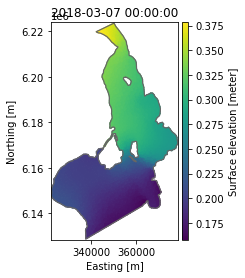

In [4]:
# default plot is a map, for multiple timestep data, the first timestep will be shown 
da.plot();

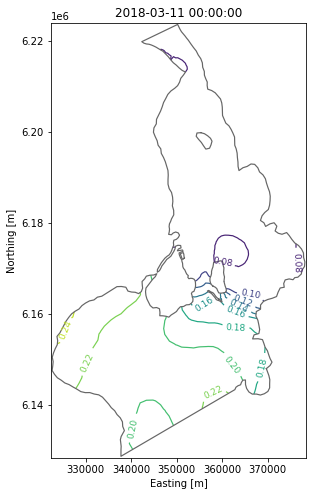

In [5]:
# plot last time step as contour map
da[-1].plot.contour(figsize=(5,8));

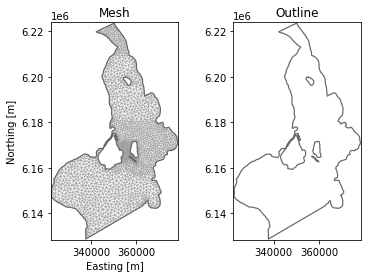

In [6]:
_, ax = plt.subplots(1,2)
da.plot.mesh(ax=ax[0])
da.plot.outline(ax=ax[1]);

### Plot aggregated data

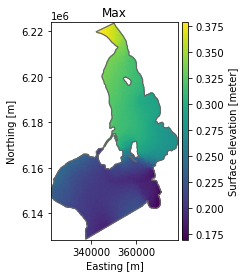

In [7]:
da.max().plot(title="Max");

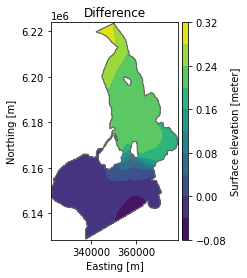

In [8]:
# difference between last and first timestep
(da[0] - da[-1]).plot.contourf(title="Difference");

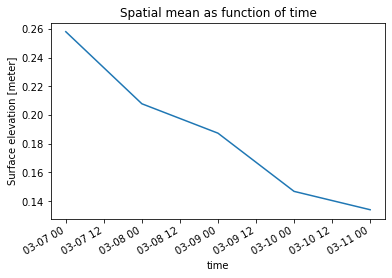

In [9]:
da.mean(axis="space").plot(title="Spatial mean as function of time");

## Other plots

* time series
* histogram

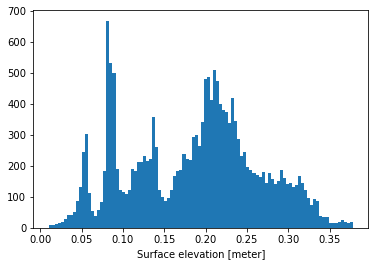

In [10]:
# plot all data as histogram
da.plot.hist(bins=100);

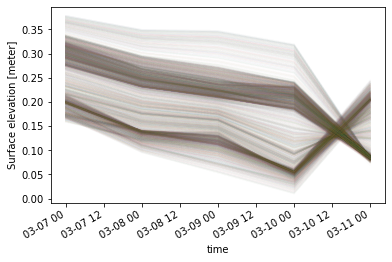

In [11]:
# plot all points as timeseries
da.plot.line(alpha=0.01);

## Dfsu 3d

In [12]:
fn = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = mikeio.open(fn)
dfs

Dfsu3DSigmaZ
number of elements: 17118
number of nodes: 12042
projection: UTM-33
number of sigma layers: 4
max number of z layers: 5
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)
time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

### Read a specific layer
If only a specific layer is read, then all the standard 2d plotting can be used 

In [13]:
ds = dfs.read(layers="top")
ds

<mikeio.Dataset>
dims: (time:3, element:3700)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: Dfsu2D (3700 elements, 2090 nodes)
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)

In [14]:
ds.geometry.is_2d

True

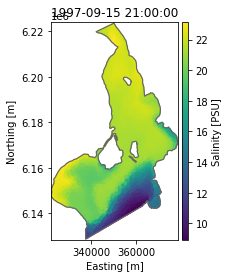

In [15]:
ds[1].plot(); 

### Default plotting behaviour for 3d files is to plot surface layer 

In [16]:
ds = dfs.read() 
ds

<mikeio.Dataset>
dims: (time:3, element:17118)
time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00 (3 records)
geometry: Dfsu3DSigmaZ (17118 elements, 4 sigma-layers, 5 z-layers)
items:
  0:  Temperature <Temperature> (degree Celsius)
  1:  Salinity <Salinity> (PSU)

In [17]:
ds.geometry.is_2d

False

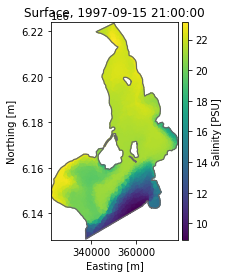

In [18]:
ds[1].plot();